# Prediction

In [15]:
from config import config
config = config.Configuration()

# run previous notebooks if necessary
if not "run_prev_notebooks" in locals(): # use case: this notebook
    run_prev_notebooks = False
    %run "1_data_preparation.ipynb"

In [16]:
%run "1_data_preparation.ipynb"

### Model

In [2]:
from core.losses import tversky, accuracy, dice_coef, dice_loss, specificity, sensitivity
from core.optimizers import adaDelta
import keras
from keras.models import load_model

OPTIMIZER = adaDelta
LOSS = tversky
# check if model_path is already defined. This is the case when you run the pipeline and not this notebook alone
if not "model_path" in locals(): model_path = config.filepath_model
model = load_model(model_path, custom_objects={'tversky': LOSS, 
                                               'dice_coef': dice_coef, 
                                               'dice_loss': dice_loss, 
                                               'accuracy': accuracy , 
                                               'specificity': specificity, 
                                               'sensitivity': sensitivity}, 
                                               compile=False)

2022-04-12 09:22:24.222938: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-04-12 09:22:24.222974: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-04-12 09:22:24.223420: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the approp

Accuracy         : 0.05063704925329507
Balanced Accuracy: 0.5179650767162606
F1 Score         : 0.031136710837932857
Precision        : 0.01581456214320721
Recall           : 1.0
AuC              : 0.5179650767162607
TP: 734818, FP: 45729826, TN: 1704316, FN: 0


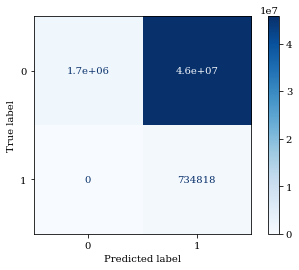

In [ ]:
# scaled - rerun
x = (pred_test <= np.average(pred_test))
eval_model(flattened_test, np.reshape(x, np.prod(x.shape)))

Accuracy         : 0.05063704925329507
Balanced Accuracy: 0.5179650767162606
F1 Score         : 0.031136710837932857
Precision        : 0.01581456214320721
Recall           : 1.0
AuC              : 0.5179650767162607
TP: 734818, FP: 45729826, TN: 1704316, FN: 0


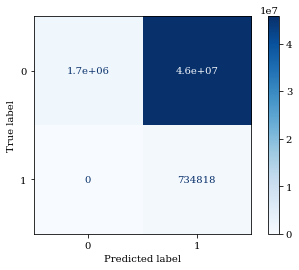

In [ ]:
x = (pred_test <= .5)
eval_model(flattened_test, np.reshape(x, np.prod(x.shape)))

Accuracy         : 0.05063704925329507
Balanced Accuracy: 0.5179650767162606
F1 Score         : 0.031136710837932857
Precision        : 0.01581456214320721
Recall           : 1.0
AuC              : 0.5179650767162607
TP: 734818, FP: 45729826, TN: 1704316, FN: 0


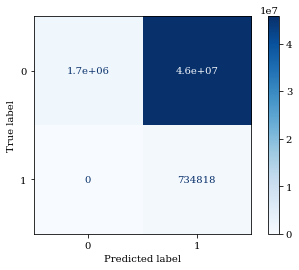

In [ ]:
x = (pred_test <= .1)
eval_model(flattened_test, np.reshape(x, np.prod(x.shape)))

Accuracy         : 0.015255010695684523
Balanced Accuracy: 0.5
F1 Score         : 0.030051584153682358
Precision        : 0.015255010695684523
Recall           : 1.0
AuC              : 0.5
TP: 734818, FP: 47434142, TN: 0, FN: 0


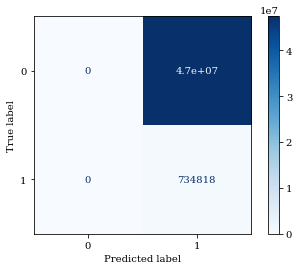

In [ ]:
x = (pred_test <= .97)
eval_model(flattened_test, np.reshape(x, np.prod(x.shape)))

Accuracy         : 0.8510078482076424
Balanced Accuracy: 0.4320968860832769
F1 Score         : 5.573513881742019e-07
Precision        : 3.1046340854982075e-07
Recall           : 2.72176239558639e-06
AuC              : 0.43209688608327695
TP: 2, FP: 6441981, TN: 40992161, FN: 734816


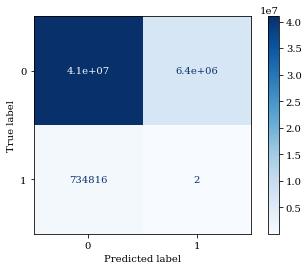

In [ ]:
# unscaled
x = (pred_test_p <= np.average(pred_test_p))
eval_model(flattened_test, np.reshape(x, np.prod(x.shape)))

------0.96------
Accuracy         : 0.9585105636492879
Balanced Accuracy: 0.4866795840852355
F1 Score         : 0.0
Precision        : 0.0
Recall           : 0.0
AuC              : 0.4866795840852355
TP: 0, FP: 1263685, TN: 46170457, FN: 734818


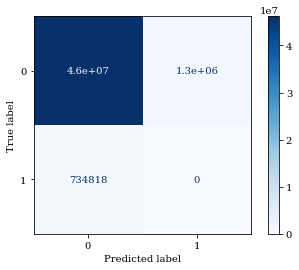

------0.965------
Accuracy         : 0.9542750559696535
Balanced Accuracy: 0.4845290234194602
F1 Score         : 0.0
Precision        : 0.0
Recall           : 0.0
AuC              : 0.4845290234194602
TP: 0, FP: 1467705, TN: 45966437, FN: 734818


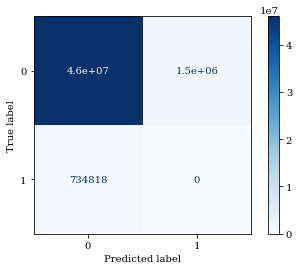

------0.975------
Accuracy         : 0.9432967620642007
Balanced Accuracy: 0.4789548422737361
F1 Score         : 0.0
Precision        : 0.0
Recall           : 0.0
AuC              : 0.4789548422737361
TP: 0, FP: 1996518, TN: 45437624, FN: 734818


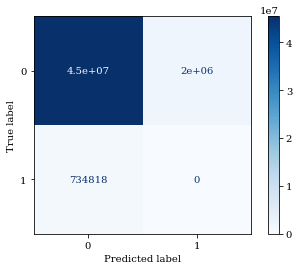

------0.98------
Accuracy         : 0.9352591585950787
Balanced Accuracy: 0.4748737839508091
F1 Score         : 0.0
Precision        : 0.0
Recall           : 0.0
AuC              : 0.4748737839508091
TP: 0, FP: 2383681, TN: 45050461, FN: 734818


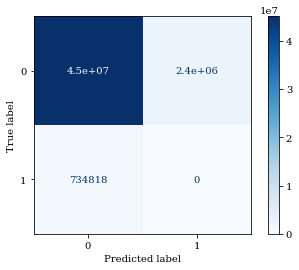

In [ ]:
for change_val in [.96, .965, .975, .98]:
    print(f"------{change_val}------")
    x = (pred_test_p <= change_val)
    eval_model(flattened_test, np.reshape(x, np.prod(x.shape)))

------0.5------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy         : 0.9847449893043154
Balanced Accuracy: 0.5
F1 Score         : 0.0
Precision        : 0.0
Recall           : 0.0
AuC              : 0.5
TP: 0, FP: 0, TN: 47434142, FN: 734818


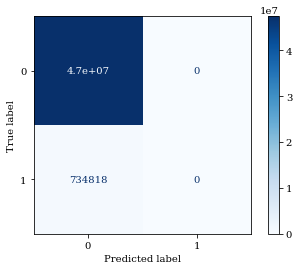

------0.9------
Accuracy         : 0.9844681512741815
Balanced Accuracy: 0.49985943669013766
F1 Score         : 0.0
Precision        : 0.0
Recall           : 0.0
AuC              : 0.49985943669013766
TP: 0, FP: 13335, TN: 47420807, FN: 734818


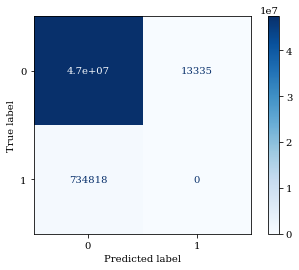

------0.91------
Accuracy         : 0.9838647128773385
Balanced Accuracy: 0.49955304345970886
F1 Score         : 0.0
Precision        : 0.0
Recall           : 0.0
AuC              : 0.49955304345970886
TP: 0, FP: 42402, TN: 47391740, FN: 734818


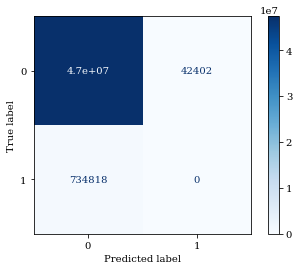

------0.93------
Accuracy         : 0.9785296796941433
Balanced Accuracy: 0.4968442034853292
F1 Score         : 0.0
Precision        : 0.0
Recall           : 0.0
AuC              : 0.4968442034853292
TP: 0, FP: 299385, TN: 47134757, FN: 734818


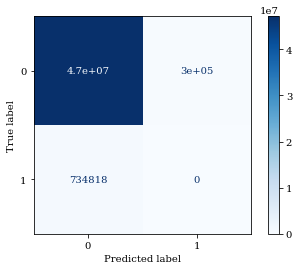

------0.94------
Accuracy         : 0.9728305946401998
Balanced Accuracy: 0.49395051775153853
F1 Score         : 0.0
Precision        : 0.0
Recall           : 0.0
AuC              : 0.49395051775153853
TP: 0, FP: 573904, TN: 46860238, FN: 734818


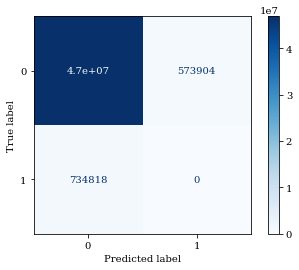

------0.95------
Accuracy         : 0.9659960688376913
Balanced Accuracy: 0.49048031689916516
F1 Score         : 0.0
Precision        : 0.0
Recall           : 0.0
AuC              : 0.49048031689916516
TP: 0, FP: 903116, TN: 46531026, FN: 734818


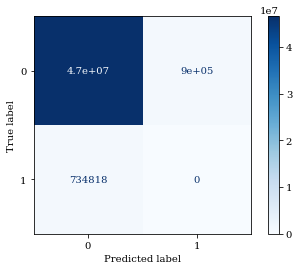

------0.99999------
Accuracy         : 0.1660943894159226
Balanced Accuracy: 0.08628847353158928
F1 Score         : 0.00014526735341252082
Precision        : 7.39869567942542e-05
Recall           : 0.003971051335160543
AuC              : 0.08628847353158926
TP: 2918, FP: 39436466, TN: 7997676, FN: 731900


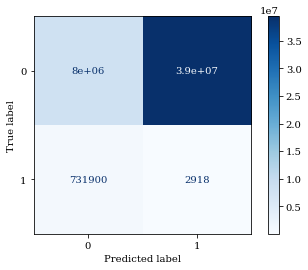

In [ ]:
for change_val in [.5, .9, .91, .93, .94, .95, .99999]:
    print(f"------{change_val}------")
    x = (pred_test_p <= change_val)
    eval_model(flattened_test, np.reshape(x, np.prod(x.shape)))

In [ ]:
f1_score(flattened_test, flattened_pred)

0.0

In [ ]:
tn, fp, fn, tp

(45729826, 1704316, 734818, 0)

In [ ]:
# New eval with average:
pred_test = (pred_test_p <= np.average(pred_test_p))
flattened_pred = np.reshape(pred_test, np.prod(pred_test.shape))
flattened_test = (flattened_test == 1.0)
eval_model(flattened_test, flattened_pred)

In [ ]:
def get_unique_val(list):
    for elem in list:
        print(list(set(elem)))

([False, True], [False, True])

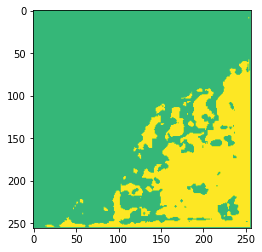

In [ ]:
plt.imshow(scale_up_color_val(pred_test_p[33]))
plt.show()

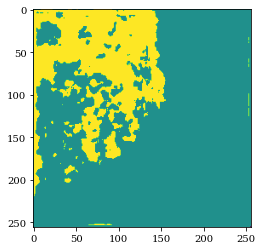

In [ ]:
plt.imshow(scale_up_color_val(pred_test_p[33]))
plt.show()

In [ ]:
pred_test_p[33][50][50], pred_test_p[33][255][255]

(array([0.9999869], dtype=float32), array([0.99900544], dtype=float32))

In [ ]:
cutout = np.array(pred_test_p[33][190:210])
cutout[160:170].shape

(0, 256, 1)

In [ ]:
#pred_test_p[33][210][150] => 1 = tree

array([0.9999999], dtype=float32)

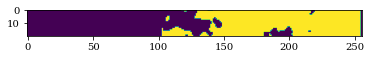

In [ ]:
plt.imshow(scale_up_color_val(pred_test_p[33][190:210])) #[160:170]
plt.show()
# größer als unten: ?

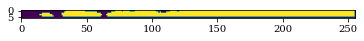

In [ ]:
plt.imshow(scale_up_color_val(pred_test_p[33][250:256]))
plt.show()
# kleiner als unten: 0.99900544 -> könnte klasse 0 kein baum sein

In [ ]:
print(f"non-tree: {pred_test_p[33][250][50][0]}, tree: {pred_test_p[33][250][250][0]}")
print(f"non-tree: {pred_test_p[33][200][240][0]}, tree: {pred_test_p[33][250][250][0]}")

non-tree: 0.9999997615814209, tree: 1.0
non-tree: 1.0, tree: 1.0


In [ ]:
plt.imshow(scale_up_color_val(pred_test_p[33][40:60][40:60]))
plt.show()
# zwischen den beiden oben: 0.9999869

In [73]:
inspect_arr(pred_test_p)
inspect_arr(pred_test)

-
Mean: 0.9968584775924683
Avg : 0.9968584775924683
Min : 0.8394709825515747
Max : 1.0
Shape: (735, 256, 256, 1)
-
Mean: 0.035382038557610546
Avg : 0.035382038557610546
Min : False
Max : True
Shape: (735, 256, 256, 1)


In [12]:
inspect_arr(pred_test_p)
inspect_arr(pred_test)

-
Mean: 0.9968584775924683
Avg: 0.9968584775924683
Min: 0.8394709825515747
Max: 1.0
-
Mean: 0.033482979983091354
Avg: 0.033482979983091354
Min: 0.0
Max: 0.9700000286102295


### Functions

In [12]:
from osgeo import gdal
def num_of_patches_in_row(filepath):
    dataset = gdal.Open(config.path_satellite + filename)
    size_x, size_y = (dataset.RasterXSize, dataset.RasterYSize)
    print(f"Size: {size_x} x {size_y}")
    print(f"#Patches in Row: {img_num_by_patch_size(size_x)}")
    del dataset, size_x, size_y

def inspect_arr(arr):
    print("-")
    print(f"Mean: {np.mean(arr)}")
    print(f"Avg : {np.average(arr)}")
    print(f"Min : {np.min(arr)}")
    print(f"Max : {np.max(arr)}")
    print(f"Shape: {np.array(arr).shape}")

def img_size_by_patches(n=429):
    # n patches need an image width of the result:
    return n * config.size - (n-1) * config.overlap
img_size_by_patches(n=483)

def img_num_by_patch_size(size):
    # how many patches are created with an image width of size
    # works only with size of 256 and overlap of 32
    # 108224 = n * config.size - (n-1) * config.overlap 
    # 7n = 108224 / 32 + 1 
    # n = 108224/224 + 1/7
    return round((size/224) + (1/7))
img_num_by_patch_size(108224)

def scale_up_color_val(array):
    return [(num*255).astype(np.uint8) for num in array]

def scale_down_color_val(array):
    return [(num/255) for num in array]


def show_pred(X, y, idx):
    print(idx)
    show(scale_up_color_val(X)[idx], scale_up_color_val(y)[idx])

# not used atm
from numpy import ndarray
def show_rounded(idx):
    rounded = [ndarray.round(num, 0) for num in pred_test]
    show_rasterio(rounded[idx])

from rasterio.plot import show as show_rasterio
from patch_creation import show
def show_img(X, y, idx):
    print(idx)
    print("Original")
    show(scale_up_color_val(X)[idx], scale_up_color_val(y)[idx])
    print("Prediction")
    # print("Rasterio")
    # show_rasterio(pred_test[idx])
    # print("Matplotlib")
    plt.imshow(scale_up_color_val(X[idx]))
    plt.show()
    plt.imshow(scale_up_color_val(y[idx]))
    plt.show()

import os.path
def file_exists(filepath):
    print(filepath, os.path.isfile(filepath))
file_exists(config.path_satellite + config.pred_imgs[0])

import matplotlib.pyplot as plt
def show_X_patch(idxs = [919, 920]):
    for x in idxs:
        plt.imshow(X_pred[x])
        plt.show()
        
def show_X_y_patch(idxs = [919, 920]):
    for idx in  idxs:
        print(idx)
        # inspect_arr(X_pred[idx])
        plt.imshow(X_pred[idx])
        # plt.imshow(scale_up_color_val(X_pred[x]))
        plt.show()
        # inspect_arr(scale_up_color_val(y_pred[idx]))
        plt.imshow(scale_up_color_val(y_pred[idx]))
        # plt.imshow(scale_up_color_val(np.reshape(pred_test_p,(256, 256, 1))))
        plt.show()

def show_X_y_patch_sm(idxs = [919, 920]):
    for idx in  idxs:
        print(idx)
        show(scale_up_color_val(X_pred[idx]), np.array(scale_up_color_val(y_pred[idx])))

def pred_show_single_patch(idx):
    y_pred = model.predict(np.expand_dims(X_pred[idx], 0))
    show(scale_up_color_val(X_pred)[idx], scale_up_color_val(y_pred))
    # scaling distorts the prediction image
    
def pred_show_single_patch_no_scaling(idx):
    y_pred = model.predict(np.expand_dims(scale_down_color_val(X_pred[idx]), 0))
    show(X_pred[idx], np.array(scale_up_color_val(y_pred)))

/home/jovyan/work/satellite_data/2629BD_2018.tif True


In [4]:
%%time
import os.path
filepath_pred_patches = f"{config.path_patches}pred_patches_{config.pred_imgs[0][:-4]}.npy"
# check if satellite image exists and the patches have not been generated previously
if os.path.isfile(config.path_satellite + config.pred_imgs[0]) and not os.path.isfile(filepath_pred_patches):
    %run "patch_creation_pred.py"
    print("Patches Created")

CPU times: user 901 µs, sys: 778 µs, total: 1.68 ms
Wall time: 2.53 ms


In [5]:
%%time
import numpy as np
filename = config.pred_imgs[0]
X_pred = np.load(filepath_pred_patches)
print(X_pred.shape)
#pred_sat = model.predict(X_pred) # confidence for class 0?

(232323, 256, 256, 3)
CPU times: user 0 ns, sys: 1min, total: 1min
Wall time: 7min 23s


In [8]:
inspect_arr(X_pred)

-
Mean: 120.32049118249998
Avg : 120.32049118249998
Min : 0
Max : 255
Shape: (232323, 256, 256, 3)


In [ ]:
inspect_arr(scale_down_color_val(X_pred))

In [ ]:
X_pred = scale_down_color_val(X_pred)

In [ ]:
for idx in range(483, 1200, 50):
    pred_show_single_patch_no_scaling(idx)

In [ ]:
y_pred = model.predict(X_pred)
filepath_pred_y = f"{config.path_patches}y_pred_patches_{filename[:-4]}.npy"
np.save(filepath_pred_y, y_pred)
# y_pred = np.load(filepath_pred_y)

In [ ]:
filepath_pred_patches, num_of_patches_in_row(filepath_pred_patches)

In [83]:
# pred single patches
if 0:
    for idx in range(len(pred_patches_idx)):
        print(pred_patches_idx[idx])
        pred_sat = model.predict(np.expand_dims(X_pred[pred_patches_idx[idx]],0))
        
        pred = np.reshape(pred_sat, (256, 256))
        sat = scale_up_color_val(X_pred[pred_patches_idx[idx]])
        show(sat, scale_up_color_val(pred))
        
        inspect_arr(pred)
        inspect_arr(sat)

        plt.imshow(pred)
        # plt.imshow(scale_up_color_val(pred_sat))
        plt.show()

    x = 4500 #1448
    for x in range(1600, 23000, 55):#[1500, 2000, 2500, 3000, 3500]:
        pred_test_p = model.predict(np.expand_dims(X_pred[x],0))

        import matplotlib.pyplot as plt
        plt.imshow(scale_up_color_val(X_pred[x]))
        plt.show()

        plt.imshow(scale_up_color_val(np.reshape(pred_test_p,(256, 256, 1))))
        plt.show()

In [ ]:
threshold = 0.5 # np.average(pred_test_p)
pred_test = (pred_test_p > threshold)

plt.imshow(scale_up_color_val(X_pred[x]))
plt.show()

plt.imshow(scale_up_color_val(np.reshape(pred_test_p,(256, 256, 1))))
plt.show()

## Reconstruct Image - Unpatchify

In [200]:
num_of_img_in_row = 429
reconstructed_shape = (img_size_by_patches(n=num_of_img_in_row), img_size_by_patches(n=2), 3)
print(reconstructed_shape)

(96128, 480, 3)


In [237]:
start_copy = int(config.overlap/2)
endof_copy = int(config.size - config.overlap/2)
# X_pred[10][start_copy:endof_copy, start_copy:endof_copy].shape
X_pred[10][start_copy:endof_copy, start_copy:endof_copy].shape

(224, 224, 3)

In [317]:
def get_window(patch_num_row, patch_num_col):
    window_extend = config.size - config.overlap
    start_row = int(patch_num_row * (config.size - config.overlap) + config.overlap / 2)
    endof_row = int(start_row + window_extend)
    start_col = int(patch_num_col * (config.size - config.overlap) + config.overlap / 2)
    endof_col = int(start_col + window_extend)
    
    window = (start_row, endof_row, start_col, endof_col)
    return window

def reconstruct_img(patches, out_shape):
    reconstructed_img = np.zeros(out_shape) # TODO: Rand wird 16 px kleiner wegen overlap
    # patch origin window extend
    start_copy = int(config.overlap/2)
    endof_copy = int(config.size - config.overlap/2)

    num_of_img_in_row = 429 # TODO: should be dynamic. calc from out_shape
    for idx, patch in enumerate(patches, start=0):
        # reconstructed_img destination window extend
        patch_num_row, patch_num_col = idx // num_of_img_in_row, idx % num_of_img_in_row
        print("patch row, column:", patch_num_row, patch_num_col)
        (start_row, endof_row, start_col, endof_col) = get_window(patch_num_row, patch_num_col)
        if endof_col > out_shape[1]: 
            print("col end:",endof_col)
            patch_num_row += 1
            patch_num_col = 0
            continue
        if endof_row > out_shape[0]: 
            print("row end:",endof_row)
            break
        print("destination extnd:", start_row, endof_row, start_col, endof_col)
        print("destination shape:", reconstructed_img[start_row:endof_row, start_col:endof_col].shape)
        reconstructed_img[start_row:endof_row, start_col:endof_col] = patch[start_copy:endof_copy, start_copy:endof_copy]
        
    plt.imshow(reconstructed_img)
    plt.show()

patch row, column: 0 0
destination extnd: 16 240 16 240
destination shape: (224, 224, 3)
patch row, column: 0 1
destination extnd: 16 240 240 464
destination shape: (224, 224, 3)
patch row, column: 0 2
col end: 688
patch row, column: 0 3
col end: 912
patch row, column: 0 4
col end: 1136
patch row, column: 0 5
col end: 1360
patch row, column: 0 6
col end: 1584
patch row, column: 0 7
col end: 1808
patch row, column: 0 8
col end: 2032
patch row, column: 0 9
col end: 2256
patch row, column: 0 10
col end: 2480
patch row, column: 0 11
col end: 2704
patch row, column: 0 12
col end: 2928
patch row, column: 0 13
col end: 3152
patch row, column: 0 14
col end: 3376
patch row, column: 0 15
col end: 3600
patch row, column: 0 16
col end: 3824
patch row, column: 0 17
col end: 4048
patch row, column: 0 18
col end: 4272
patch row, column: 0 19
col end: 4496
patch row, column: 0 20
col end: 4720
patch row, column: 0 21
col end: 4944
patch row, column: 0 22
col end: 5168
patch row, column: 0 23
col end: 

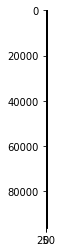

In [318]:
out_shape = (img_size_by_patches(n=429), img_size_by_patches(n=2), X_pred.shape[3])
reconstruct_img(X_pred, out_shape)

(480, 480, 3)


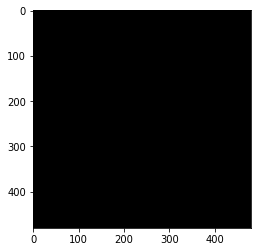

TypeError: Invalid shape (0, 256, 256, 3) for image data

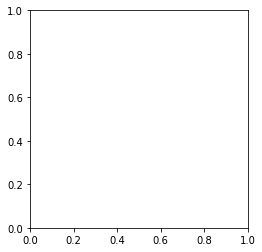

In [324]:
print(reconstructed_img[4000:4480].shape)
plt.imshow(reconstructed_img[4000:4480])
plt.show()
# satellite = rasterio read col/row
# plt.imshow(satellite[4000:4480])
# plt.show()

In [217]:
from patchify import unpatchify
# merge imgs
reconstructed_image = unpatchify(X_pred, reconstructed_shape) #patches, shape

AssertionError: The patches dimension is not equal to the original image size